In [8]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib
import matplotlib.pyplot as plt

[[0.03571429]
 [0.10714286]
 [0.17857143]
 [0.25      ]
 [0.32142857]
 [0.39285714]
 [0.46428571]]
[[0.03571429]
 [0.10714286]
 [0.17857143]
 [0.25      ]
 [0.32142857]
 [0.39285714]
 [0.46428571]]
[[0.03571429]
 [0.10714286]
 [0.17857143]
 [0.25      ]
 [0.32142857]
 [0.39285714]
 [0.46428571]]


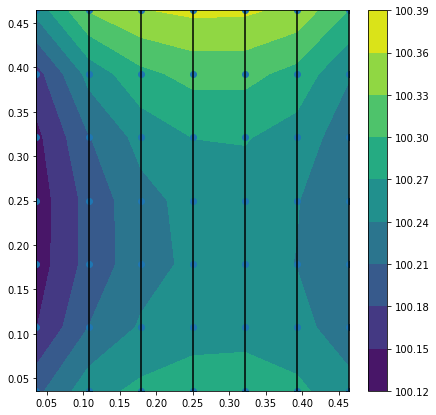

In [114]:
Lx=0.5; Ly=0.5; n = 7; m = 7; nn=n*m; # Geom descretization/mesh
Ta=100.1; Tb=100.2; Tc=100.3; Td=100.4; # BCs
k=0.5;  # Properties
 
dx = Lx/n;  dy = Ly/m;   
x = np.linspace(dx/2,Lx-dx/2,n); y = np.linspace(dy/2,Ly-dy/2,m); [X, Y]=np.meshgrid(x,y); 

A=np.zeros([nn,nn]); b=np.zeros([nn]); d2=np.zeros([m,n])

dz=1;  G=k; q=100000; 

for j in range(m): 
     for i in range(n): 
        P = j*n+i; W = P-1; E = P+1; N=P+n; S=P-n; 
        Aw = dy*dz; Ae=Aw; An=dx*dz; As = An; Su=0; Sp=0; Sua=0*q*Aw*dx; Sub=0*q*Ae*dx; Suc=0*q*As*dy; Sud=0*q*An*dy; 
        aW = G*Aw/dx; aE = G*Ae/dx; aN = G*An/dy; aS = G*As/dy;
        if(i>0): 
            A[P,W]=-aW; 
        else: 
            aW=0; Sp=Sp-2*G*Aw/dx; Su=Su+Sua + 2*G*Aw/dx*Ta; #aW=0; Sp=Sp-2*G*Aw/dx; Su=Su + 2*G*Aw/dx*Ta;
        
        if(i<n-1): 
            A[P,E]=-aE; 
        else:
            aE=0; Sp=Sp-2*G*Ae/dx; Su=Su+Sub + 2*G*Ae/dx*Tb;
        if(j>0): 
            A[P,S]=-aS; 
        else:
            aS=0; Sp=Sp-2*G*As/dy; Su=Su+Suc + 2*G*As/dy*Tc;
        if(j<m-1): 
            A[P,N]=-aN; 
        else:
            aN=0; Sp=Sp-2*G*An/dy; Su=Su+Sud + 2*G*An/dy*Td;
        
        aP = aW + aE + aS + aN - Sp; 
        A[P,P] = aP; 
        b[P]=Su; 

d=np.linalg.solve(A,b);  

for j in range(m):
    for i in range(n):
        IN=j*n+i; d2[j,i]=d[IN];


node1 = np.empty([n, 1])
#x_limit = 
for i in range(int((n/2))):
    
    for j in range(int((n/2))):
            #node1[i][j] = X[2*j][2*i]
            node1[i*2] = X[2*j][2*i]
            #node1.append(X[2*j][2*i])

        #if i>0:

            #node1.append(X[i][j])
            #node1.append(X[i+1])

fig = plt.figure()
plt.contourf(X, Y, d2)
plt.colorbar()
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(X, Y, color = 'black')
plt.scatter(X,Y)
plt.show()
